In [8]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], 
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.10.1
2.10.0


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [10]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, 
                        padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                589888    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [12]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                    validation_data=(test_images, test_labels), 
                    epochs=50)

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.7196 - accuracy: 0.7511 - val_loss: 0.4023 - val_accuracy: 0.8582
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4647 - accuracy: 0.8392 - val_loss: 0.3455 - val_accuracy: 0.8727
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4016 - accuracy: 0.8584 - val_loss: 0.3118 - val_accuracy: 0.8877
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3658 - accuracy: 0.8704 - val_loss: 0.2911 - val_accuracy: 0.8950
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3358 - accuracy: 0.8803 - val_loss: 0.2817 - val_accuracy: 0.8989
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3134 - accuracy: 0.8884 - val_loss: 0.2602 - val_accuracy: 0.9060
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2916 - accuracy: 0.8958 - val_loss: 0.2667 - val_accuracy: 0.9034
Epoch 

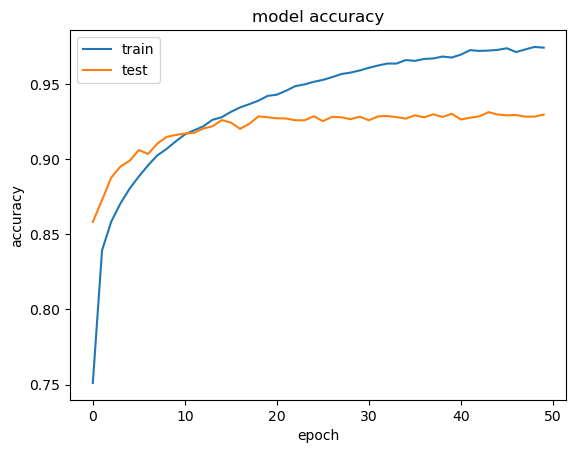

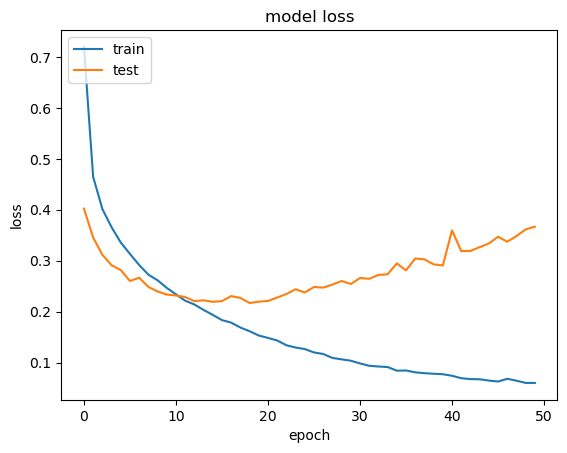

In [18]:
# plot accuracy history
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

อาทิตย์ที่แล้ว loss: 0.1865 - accuracy: 0.9291 - val_loss: 0.2611 - val_accuracy: 0.9092 <br>
ปัจจุบัน: loss: 0.0646 - accuracy: 0.9722 - val_loss: 0.3612 - val_accuracy: 0.9298 <br>
แต่เมื่อดูจากกราฟแล้ว val_loss สูงเกิน โมเดลยังสามารถจดจำ train data ได้มากจนเกินไป (overfitting) ลองใส่ dropout เพิ่มดู <br>
ไปที่ไฟล์ Convolution x 2 + Dense 64 + Dropout x 3

แต่ก่อนที่จะไปลองมาดูกันก่อนว่า เมื่อเราใส่ max pooling ไปแล้วประสิทธิภาพการทำนายนั้นเป็นอย่างไรบ้าง

In [19]:
predictions = model.predict(test_images)
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

313/313 [==============================] - 0s 1ms/step


In [20]:
predictions[12]

array([1.8158923e-07, 8.6022379e-15, 2.8009603e-10, 2.4213062e-07,
       1.0756911e-14, 1.6287680e-01, 1.1961537e-14, 8.3578867e-01,
       1.3337783e-03, 2.7290335e-07], dtype=float32)

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

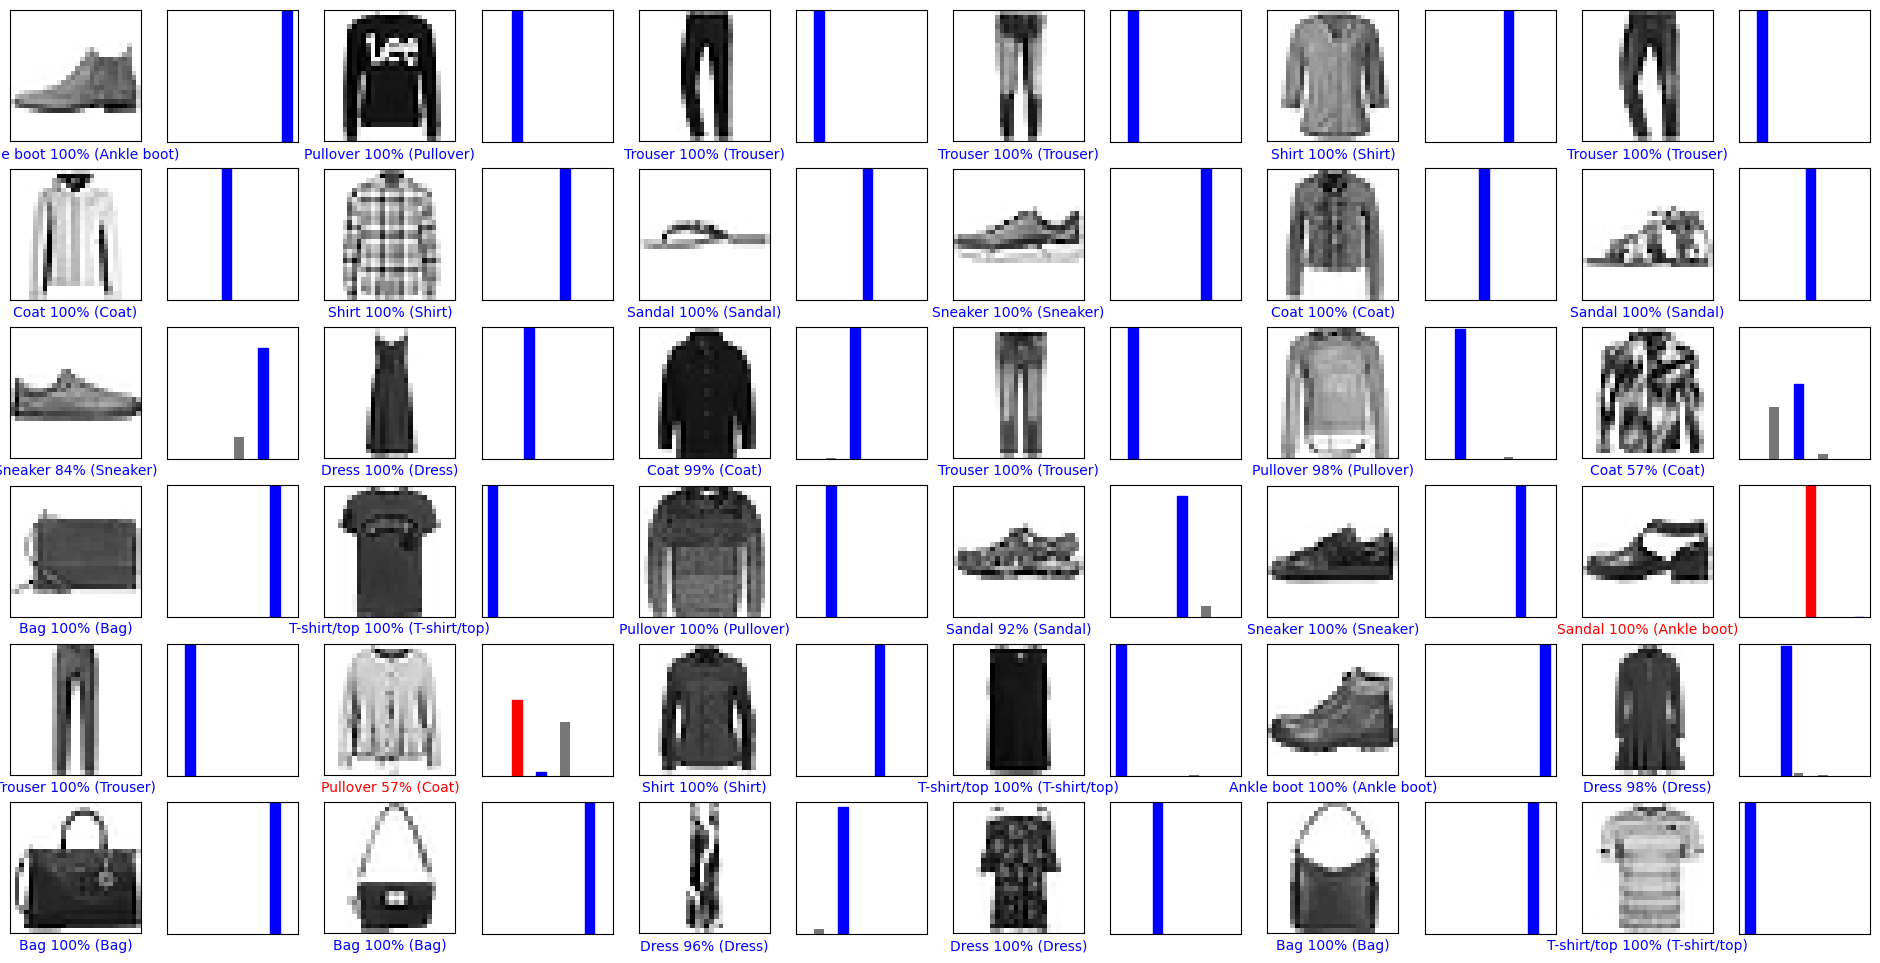

In [24]:
num_rows = 6
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)